# IBM Advance Datascience Specialization - Capstone Project [Model Selection & Data Product]

#### Dataset Details: Real World Car Insurance Fraud Dataset - Non Synthetic.
Source: Kaggle<br>
URL : https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud<br>
DataSet Description: https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud/discussion/133719 <br>
Dataset More Information: https://sites.google.com/site/cliftonphua/publications?authuser=0

In [8]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import dill as pickle

In [2]:
df = pd.read_excel('./Dataset.xlsx', 
                   sheet_name = 'Sheet1')

df_encoded = df.copy()
mean_age = df_encoded['Age'].mean()
df_encoded['Age'] = df_encoded['Age'].fillna(mean_age)
mean_DriverRating = df_encoded['DriverRating'].mean()
df_encoded['DriverRating'] = df_encoded['DriverRating'].fillna(mean_DriverRating)
df_encoded = df_encoded.dropna().reset_index(drop=True)
df_encoded.name = "Insurance Fraud Data"


label_encoder = preprocessing.LabelEncoder()

cols_to_encode = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'BasePolicy', \
                   'NumberOfCars', 'AddressChange_Claim', 'NumberOfSuppliments', 'WitnessPresent', 'PoliceReportFiled', \
                   'AgeOfPolicyHolder', 'AgeOfVehicle', 'Days_Policy_Claim', 'Days_Policy_Accident', 'PastNumberOfClaims', \
                   'Sex', 'MaritalStatus', 'AgentType', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice']

for col in cols_to_encode:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded.drop('FraudFound_P', axis = 1))
y = df_encoded['FraudFound_P'].values

X_f = df_encoded.drop('FraudFound_P', axis = 1).values
y_f = df_encoded['FraudFound_P'].values

X_train, X_test, y_train, y_test = train_test_split(
                    X_f, y_f, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection - Machine Learning

In our project we select one of the ML models as machine learning algorithms are generally used for smaller datasets <br>
and our datasize is rather small (2.0 Mb). But in the above deep learning models section in this notebook, it is well<br>
demonstrated that deep learning models can also give equally good if not better rezults, perhaps as the training dataset <br>
grows larger in size, we might consider switching to deep learning models for better performance and accuracy.<br>

We see from the above set of hyper-parameter tuned ML models, the best ML model is:<br>
* Histogram Baised Gradient Boosting Tree Classifier  {AUC: 0.94, Accuracy: 0.95, balanced accuracy = 0.67}

### Selected Model's Metrics- Accuracy, Precision, Recall, F1-Score, Balanced Accuracy 

In [3]:

model_op = HistGradientBoostingClassifier(learning_rate=0.68, max_depth=3, max_iter=423)

model_op.fit(X_train, y_train)

y_test_op = model_op.predict(X_test)

b_accr = balanced_accuracy_score(y_test, y_test_op)
accr = accuracy_score(y_test_op, y_test)
rep = classification_report(y_test_op, y_test)

print("Report on test data for HGB-Tree Output model", '\n', rep)
print("Accuracy on test data for HGB-Tree Output model", ":", accr)
print("Balanced Accuracy on test data for HGB-Tree Output model", ":", b_accr)

Report on test data for HGB-Tree Output model 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2241
           1       0.35      0.65      0.45        72

    accuracy                           0.95      2313
   macro avg       0.67      0.81      0.71      2313
weighted avg       0.97      0.95      0.96      2313

Accuracy on test data for HGB-Tree Output model : 0.9507133592736705
Balanced Accuracy on test data for HGB-Tree Output model : 0.6670522710691994


### Selected Model's Metrics- AUC & ROC

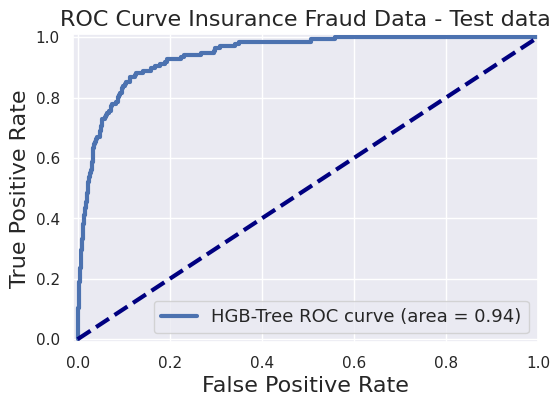

In [10]:
y_score = model_op.predict_proba(X_test)[:,1]
fpr_GBC, tpr_GBC, _ = roc_curve(y_test, y_score)
roc_auc_GBC = auc(fpr_GBC, tpr_GBC)

plt.figure(figsize=(6, 4))
sns.set(style = "darkgrid")
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_GBC, tpr_GBC, lw=3, label='HGB-Tree ROC curve (area = {:0.2f})'.format(roc_auc_GBC))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve Insurance Fraud Data - Test data', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

 ### Selected Model's Metrics- The Confusion Matrix

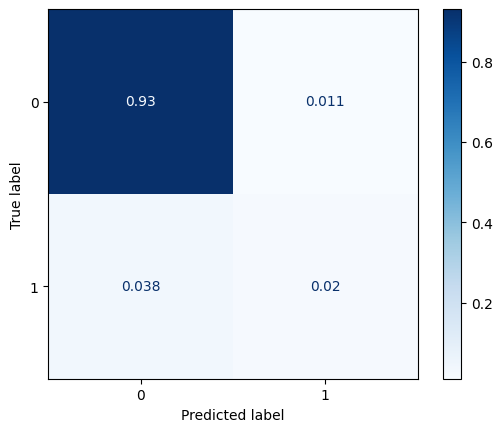

In [13]:
sns.reset_orig()
cm = confusion_matrix(y_test, y_test_op, labels=model_op.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_op.classes_, )
disp.plot(cmap=plt.cm.Blues)
plt.show()

### A Statistical Analysis of Our Final Model.

Now we present the 95% confidence interval of accuracy of our HGB-Tree Classifier output model Accuracy = (0.94619, 0.95520)$^*$.<br>
This means that with 95% confidence, the proportion of accurate predictions
from our model is estimated to be between 94.619% - 95.520%.


This is calculated using the standard formulae: $CI = \hat{p} \pm  z \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$
here $z = 1.96$ is the statistical ratio from the normal distribution for the 95% confidence level,<br>
$\hat{p}$ is the base proportion and $n$ is the sample size.<br>
<br>
$^*$ <sub><sup>Subject to the condition that the Central Limit Theorem of Statistics holds for the predictions from our model.<br>
               And the data fed to this model for analysis come from the same source which generated the training data,<br>
               collecting data under same/similar conditions as that of the training data collection conditions.<br></sub></sup>



## Data Product - Final Deliverable

### Generate Data Product

Run the Following cell to create the data product, it is a fully trained ML Pipeline designed to be directly used in production senarios,<br>
we just have to feed it with data and it will output the predictions.

In [15]:
df = pd.read_excel('./Dataset.xlsx', 
                   sheet_name = 'Sheet1')

#basic dropna and imputing transformer for pipeline
def preprocess_impute_dropna(X, y=None):
    df = pd.DataFrame(X)
    mean_age = df['Age'].mean()
    df['Age'] = df['Age'].fillna(mean_age)
    mean_DriverRating = df['DriverRating'].mean()
    df['DriverRating'] = df['DriverRating'].fillna(mean_DriverRating)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    
    return df

preprocess_impute_dropna_tr = FunctionTransformer(preprocess_impute_dropna, validate=False)

#string columns to integer labels transformer for pipeline
class preprocess_encode(BaseEstimator, TransformerMixin):
    def __init__(self):
        
        self.cols_to_encode = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'BasePolicy', \
                   'NumberOfCars', 'AddressChange_Claim', 'NumberOfSuppliments', 'WitnessPresent', 'PoliceReportFiled', \
                   'AgeOfPolicyHolder', 'AgeOfVehicle', 'Days_Policy_Claim', 'Days_Policy_Accident', 'PastNumberOfClaims', \
                   'Sex', 'MaritalStatus', 'AgentType', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice']

        self.label_encoders={}
        for i in self.cols_to_encode:
            self.label_encoders[i]=preprocessing.LabelEncoder()
        return
     
    def transform(self, dataset):
        for col in self.cols_to_encode:
            dataset[col] = self.label_encoders[col].transform(dataset[col].astype(str))
        return dataset.values              # make sure to return values instead of DataFrame
    
    def fit(self, dataset, y=None):
        for col in self.cols_to_encode:
            self.label_encoders[col].fit(dataset[col].astype(str))
        return self

preprocess_encoder_tr = preprocess_encode()

#MinMax scaler transformer for pipeline
scaler_tr = MinMaxScaler()

#Hyperparameters tuned HGB-Tree Classifier model for pipeline
HGB_tree_classifier_model = HistGradientBoostingClassifier(learning_rate=0.68, max_depth=3, max_iter=423)

#make the ML pipeline object
Pipe_op = make_pipeline(preprocess_impute_dropna_tr, preprocess_encoder_tr, scaler_tr, HGB_tree_classifier_model)

#Fit the pipeline object with the full dataset at hand, for training.
Pipe_op.fit(df.drop('FraudFound_P', axis = 1), df['FraudFound_P'])

#Sanity check on the same training data, for pipeline structure and performance validity.
Y_pred = Pipe_op.predict(df.drop('FraudFound_P', axis = 1))
print('Sanity Check, accuracy(should be roughly near 1.0):', accuracy_score(Y_pred, df['FraudFound_P'].values))

# Use pickle to save model for next usage.
filename = 'HGB_Classifier_model_v1_insurance_data.pk'
with open('./'+filename, 'wb') as file:
    pickle.dump(Pipe_op, file) 

print("ML pipeline saved to pickle file HGB_Classifier_model_v1_insurance_data.pk")
print("Don't delete the file HGB_Classifier_model_v1_insurance_data.pk! Otherwise the data product will become unusable")

Sanity Check, accuracy(should be roughly near 1.0): 0.9543450064850844
ML pipeline saved to pickle file HGB_Classifier_model_v1_insurance_data.pk
Don't delete the file HGB_Classifier_model_v1_insurance_data.pk! Otherwise the data product will become unusable


### Data Product Usage

In [17]:
#Data Product Usage  
#1). read an excel file containing data (this must be in the same format
#    of the training dataset but WITHOUT THE TARGET PREDICTION COLUMN)
#2). read the saved pipeline from disk
#3). predict insurance fraud with ML pipeline
#4). remove the # from the lines given below to use the code

#df_in = pd.read_excel('./Dataset_in.xlsx', sheet_name = 'Sheet1')
#filename = 'HGB_Classifier_model_v1_insurance_data.pk'

#with open('./'+filename ,'rb') as f:
#   HGB_Classifier_insurance_data_model_v1 = pickle.load(f)

#fraud_prediction = HGB_Classifier_insurance_data_model_v1.predict(df_in)
